## EDA on BLACK FRIDAY SALE 

## 1. Data Description


### 1.1 Data History

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### 1.2 Data source and dataset

Data set link : https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda

## 2. Load the pakages and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

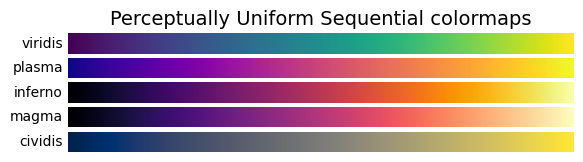

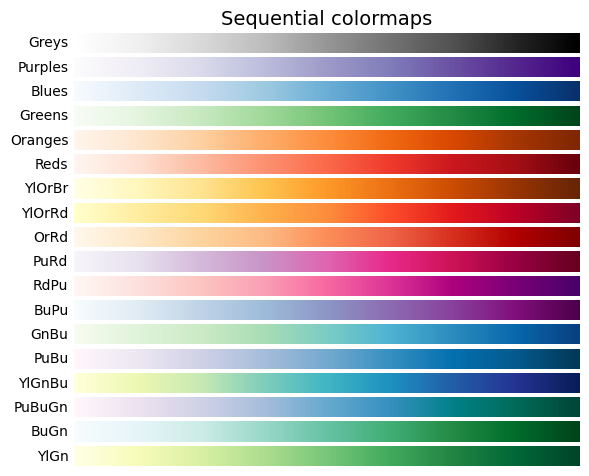

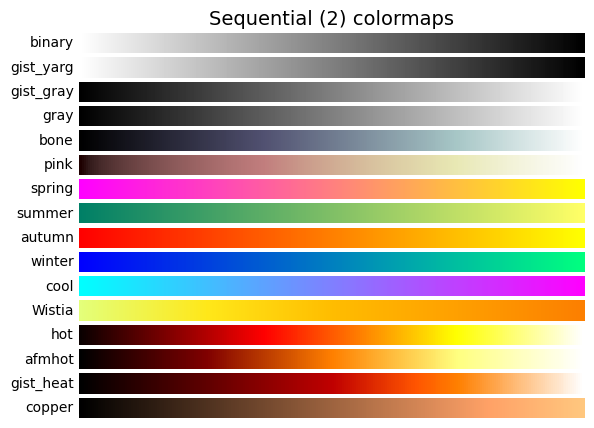

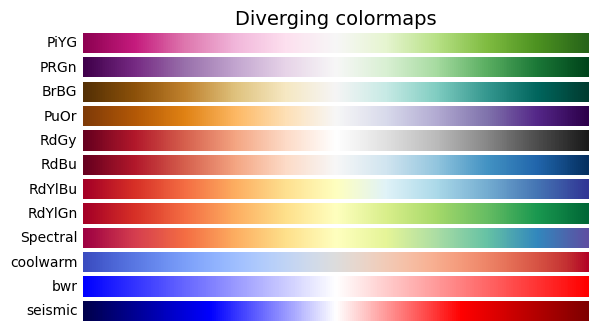

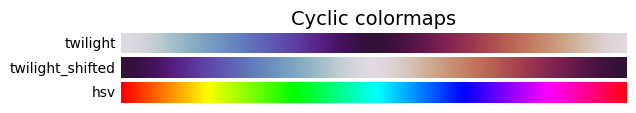

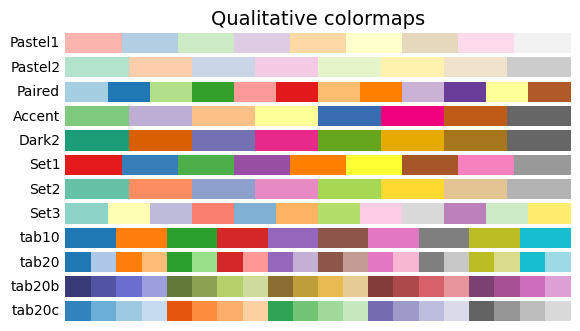

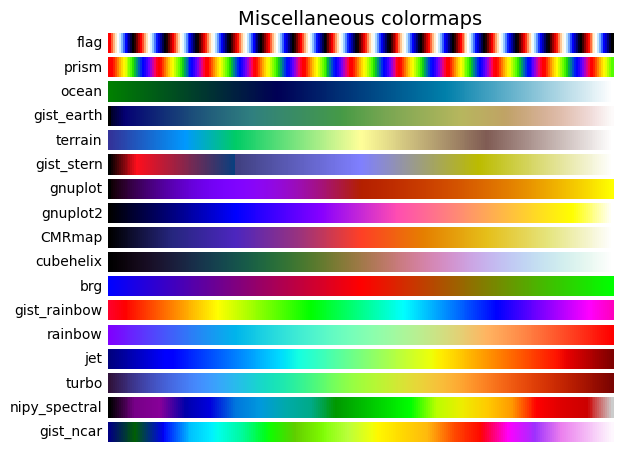

In [2]:
import numpy as np
import matplotlib.pyplot as plt

cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axs[0].set_title(f"{cmap_category} colormaps", fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_name)
        ax.text(-.01, .5, cmap_name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

In [3]:
import csv
#Read the dataframe
sale = pd.read_csv(r"C:\Project\train.csv")

## 3. Data Profiling ( Data Exploration)

### 3.1 Understanding the Dataset(Basic information about dataset)

In [4]:
sale.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
sale.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [6]:
sale.shape

(550068, 12)

In [7]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
sale.size

6600816

In [9]:
sale.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
sale.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [11]:
sale.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
sale.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

### 3.2 Data Preparation(Data Cleaning)

- Check missing values
- Fill null values

In [13]:
sale.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,True,True,False
550064,False,False,False,False,False,False,False,False,False,True,True,False
550065,False,False,False,False,False,False,False,False,False,True,True,False
550066,False,False,False,False,False,False,False,False,False,True,True,False


In [14]:
missing = sale.isnull().sum()
missing

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [15]:
#Show in percentage
missing1 = sale.isnull().sum()/len(sale)*100
missing1

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [16]:
##making a copy of dataset for modeling
sale_copy = sale.copy()
sale_copy.shape

(550068, 12)

In [17]:
sale = sale.fillna(value="missing")
sale.shape

(550068, 12)

In [18]:
#Check duplicate rows
sale[sale.duplicated()].sum()

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

## 4. DATA VISUALIZATION

### 4.1 COUNT BY GENDER

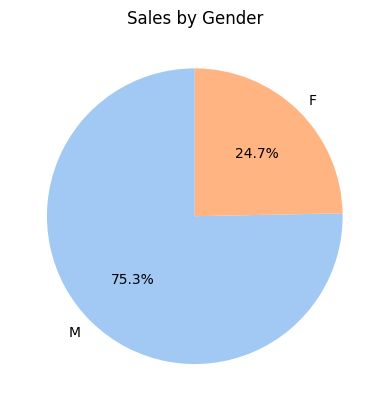

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of sales by gender
sale_counts = sale['Gender'].value_counts()

colors = sns.color_palette('pastel')

# Create a pie chart of the Gender column
fig, ax = plt.subplots()
ax.pie(sale_counts.values, labels=sale_counts.index, autopct='%1.1f%%', startangle=90,colors=colors)
ax.set_title('Sales by Gender')

# Show the plot
plt.show()


According to the pie chart above, there weren't many female shoppers during the Black Friday sale. Yet, it may also indicate that fewer women purchased the goods, or perhaps their partners did

### 4.1 COUNT BY AGE

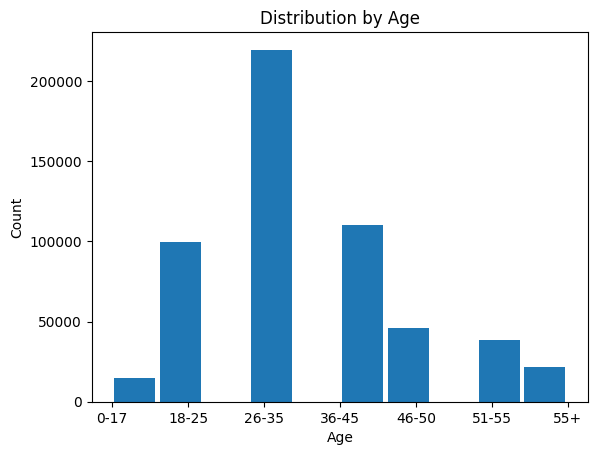

In [20]:
#Sort the Age value 
sale = sale.sort_values(by='Age')

plt.hist(sale['Age'], bins=10,rwidth=0.9)
plt.title('Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


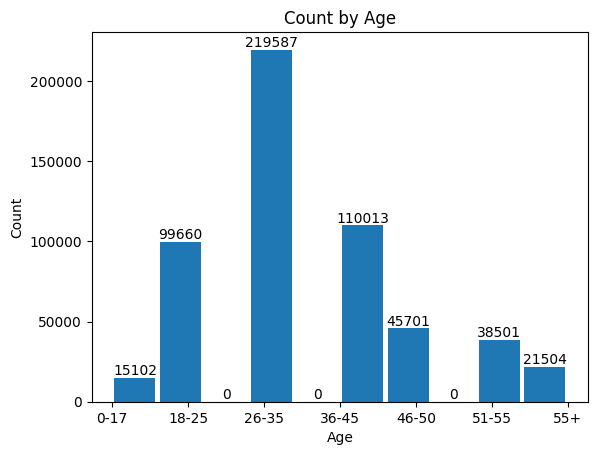

In [21]:
# Vẽ biểu đồ histogram
fig, ax = plt.subplots()
n, bins, patches = ax.hist(sale['Age'], bins=10, rwidth=0.9)

# Thêm nhãn vào các cột nhỏ
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    label = int(patches[i].get_height())
    ax.text(x, y, label, ha='center', va='bottom')

# Đặt tiêu đề và nhãn cho trục
plt.title('Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Hiển thị biểu đồ histogram
plt.show()

 Count plot for age, looks like people in the ages group 26-35 most come to the Black Friday Sales

## 4.2 Numbers of unique products per age group

In [22]:
sale_age_group = sale.groupby("Age")["Product_ID"].nunique().reset_index()

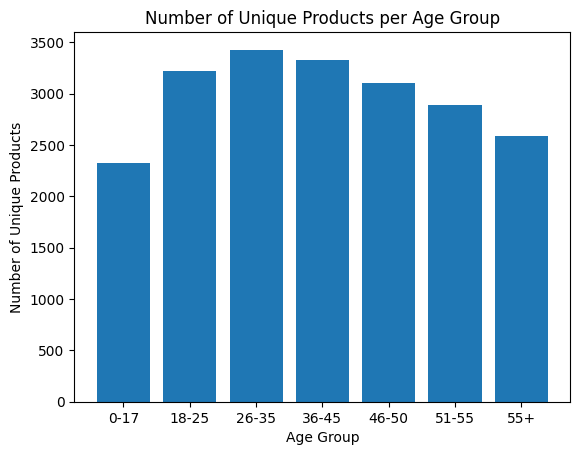

In [23]:

plt.bar(sale_age_group["Age"], sale_age_group["Product_ID"])
plt.xlabel("Age Group")
plt.ylabel("Number of Unique Products")
plt.title("Number of Unique Products per Age Group")
plt.show()


### 4.3 Amount spent distribution

In [24]:
sale_age_spent = sale.groupby("Age")["Purchase"].sum().reset_index()

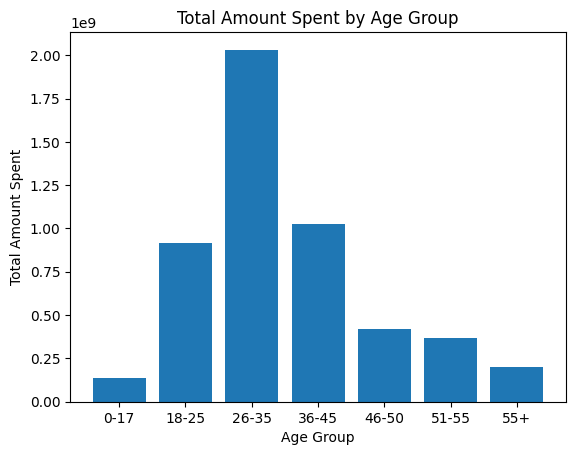

In [25]:
plt.bar(sale_age_spent["Age"], sale_age_spent["Purchase"])
plt.xlabel("Age Group")
plt.ylabel("Total Amount Spent")
plt.title("Total Amount Spent by Age Group")
plt.show()
#Add label inside each column
#for i in range(len(sale_age_spent)):
    #plt.text(i, sale_age_spent["Purchase"][i]/2, sale_age_spent["Purchase"][i], ha="center", color="white")

### 4.4 AVERAGE AMOUNT SPENT DISTRIBUTION

In [26]:
sale_age_spent = sale.groupby("Age")["Purchase"].mean().reset_index()


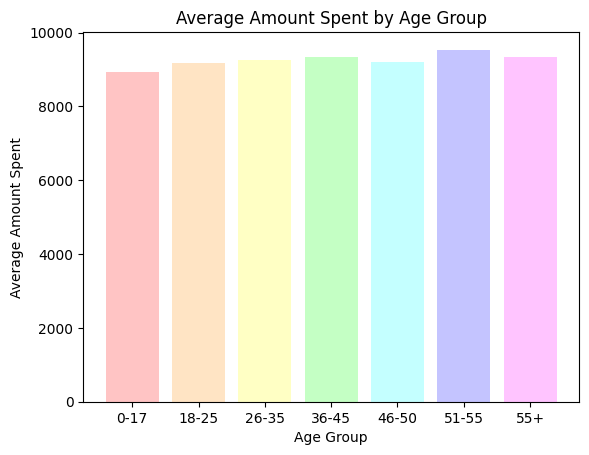

In [27]:
# Define colors for each age group
colors = ["#FFC4C4", "#FFE4C4", "#FFFFC4", "#C4FFC4", "#C4FFFF", "#C4C4FF", "#FFC4FF"]

plt.bar(sale_age_spent["Age"], sale_age_spent["Purchase"], color=colors)

plt.xlabel("Age Group")
plt.ylabel("Average Amount Spent")
plt.title("Average Amount Spent by Age Group")

plt.show()

The fact that the columns have the same height for each age group indicates that the average spending is consistent across all age groups. This might imply that there is no discernible variation in the dataset's purchase behavior between the various age groups.

## 5. Prediction

### 5.1 Data mapping

In [28]:
#drop the product ID and user ID 
sale_copy = sale_copy.drop(["User_ID","Product_ID"],axis = 1)

In [29]:
def map_gender(gender):
    if gender =='M':
        return 1
    else:
        return 0 
sale_copy['Gender']= sale_copy['Gender'].apply(map_gender)

In [30]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
sale_copy['Age'] = sale_copy['Age'].apply(map_age)

In [31]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
sale_copy['City_Category'] = sale_copy['City_Category'].apply(map_city_categories)

In [32]:
def map_stay(stay):
    if stay == '4+':
        return 4
    else:
        return int(stay)

sale_copy['Stay_In_Current_City_Years'] = sale_copy['Stay_In_Current_City_Years'].apply(map_stay)

   

<Axes: >

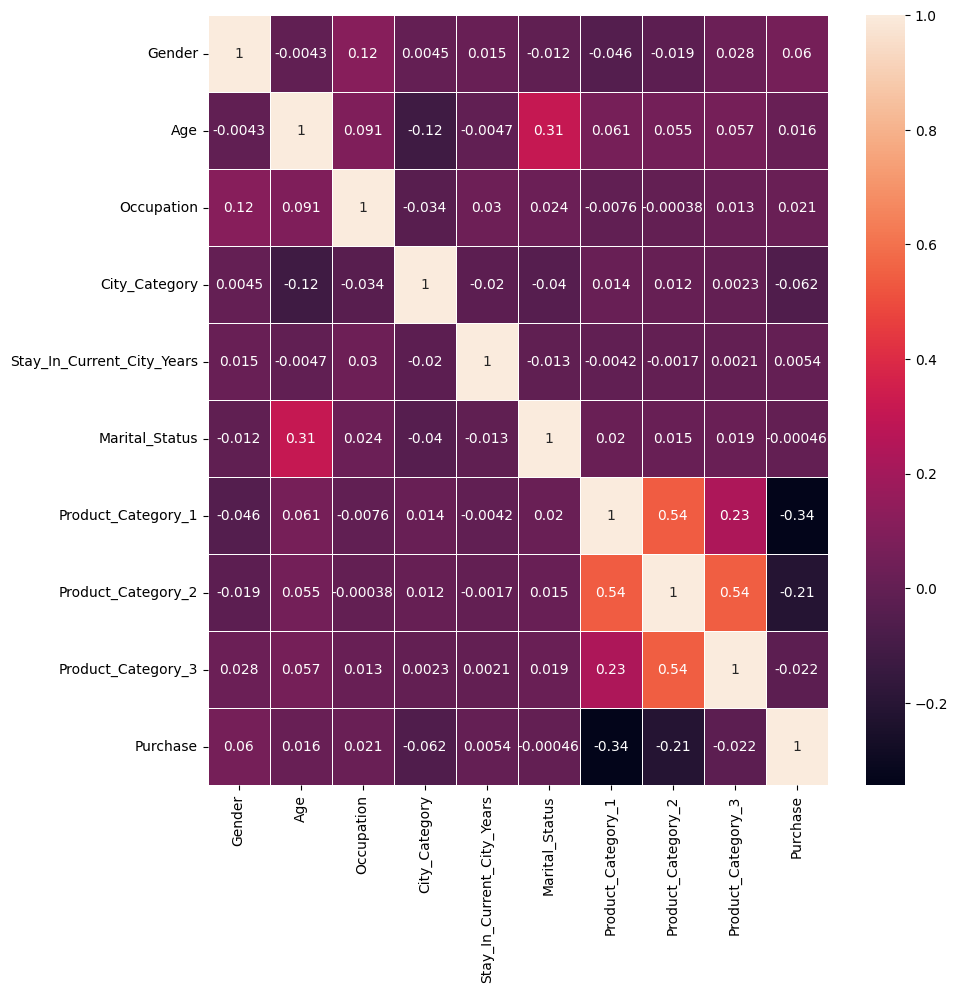

In [33]:
corr = sale_copy.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,
    xticklabels=corr.columns, 
    yticklabels=corr.columns,  
    annot=True, linewidths=0.5, 
    ax=ax)

### 5.2 Model

In [44]:
#Spliting data 
x = sale_copy.drop('Purchase',axis=1)
y = sale_copy['Purchase']


In [80]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor

In [98]:
lr_range = [0.25]
n_est_range = [150]
depth_range = [8]


parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=depth_range)

In [99]:
kfold = StratifiedKFold(n_splits=5, random_state=2022,shuffle=True)

In [100]:
clf =XGBRegressor(random_state=2022)

In [101]:
model = GridSearchCV(clf, param_grid=parameters,
                 cv=kfold,scoring='r2')

In [102]:
model.fit(x,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_ty...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
             

In [103]:
print(model.best_score_)

0.677960055678032
